#### Name: Bhekie Danisa

#### Student no: 201633631

#### NAML84112 Assignment: Least Squares Regression

##### .

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import distributions as dist

#### 1.1 Generateing data and the Design Matrix X. 

In [183]:
n = 100
x = dist.uniform(0, 20).rvs(n)
x = x[np.argsort(x)]

y = 4 + 0.5 * x
y_obs = y + dist.norm(0, 0.5).rvs(n)
X = np.c_[np.ones(n), x]

#### 1.2. Computing the Maximum likelihood Estimates θ0 and θ1.

In [184]:
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs)

In [185]:
θ

array([4.0025461 , 0.49577568])

In [186]:
y_new = θ[0] + θ[1] * x

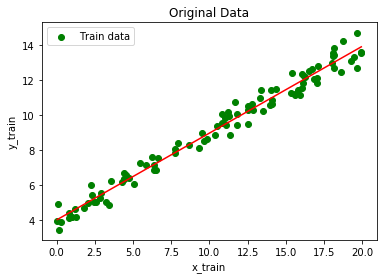

In [187]:
plt.scatter(x, y_obs, color='g', label='Train data')
plt.plot(x, y_new, color='r')
plt.title('Original Data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

#### 1.3. Computing the Maximum likelihood Estimate σ2

In [188]:
σ_squared = (1/n) * (((y_obs-X.dot(θ)).T).dot(y_obs-X.dot(θ)))

In [189]:
σ_squared

0.20569463944311966

#### 1.5. Generate data from uniform(20, 25) and use it as a test dataset. 

In [190]:
x_test = dist.uniform(20, 25).rvs(n)
x_test = x_test[np.argsort(x_test)]
X_test = np.c_[np.ones(n), x_test]
μ = (X_test.dot(θ))

#### 1.5. Generating Data from Gaussian Distribution with the mean XθMLE and variance σ2MLE where X is the same as your Training Set and plot the data on the same set of axes with your train set. 

In [191]:
y_test = np.random.normal(μ, σ_squared)

#### 1.6. Reproducing the Figure below:

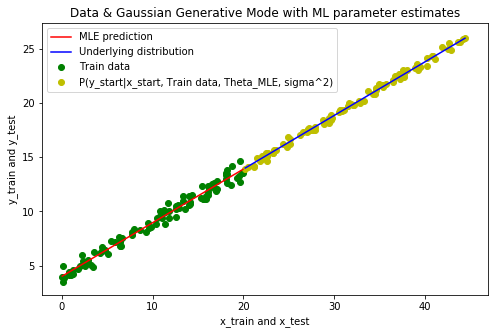

In [192]:
y_test1 = θ[0] + θ[1]*x_test
plt.figure(figsize=(8,5))

plt.scatter(x, y_obs, color='g', label='Train data')
plt.plot(x, y_new, color='r', label='MLE prediction')
plt.plot(x_test, y_test1, color='b', label='Underlying distribution')
plt.scatter(x_test, y_test, color='y', label='P(y_start|x_start, Train data, Theta_MLE, sigma^2)')
plt.title('Data & Gaussian Generative Mode with ML parameter estimates')
plt.xlabel('x_train and x_test')
plt.ylabel('y_train and y_test')
plt.legend()
plt.show()